In [13]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import data
from skimage import filters

In [2]:
camera = data.camera()
camera.dtype

dtype('uint8')

In [3]:
camera.shape

(512, 512)

In [4]:
filtered_camera = filters.gaussian(camera, 1)
type(filtered_camera)

numpy.ndarray

## I/O, data types and colospaces

### IO

In [7]:
from skimage import io

In [10]:
import os
filename = os.path.join(skimage.data_dir, 'camera.png')
camera = io.imread(filename)

In [11]:
logo = io.imread('http://scikit-image.org/_static/img/logo.png')

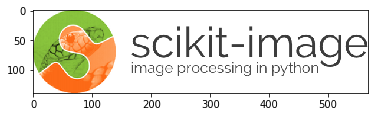

In [14]:
plt.imshow(logo)

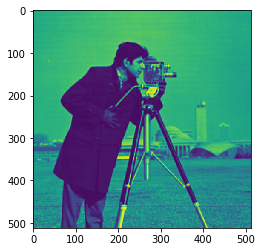

In [15]:
plt.imshow(camera)

In [17]:
io.imsave('local_logo.png', logo)

### Datatypes

In [18]:
camera.dtype

dtype('uint8')

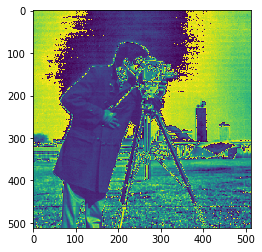

In [28]:
camera_multiply = camera * 3
plt.imshow(camera_multiply)

In [29]:
from skimage import img_as_float
camera_float = img_as_float(camera) #lies in [-1, 1]
camera.max(), camera_float.max()

(255, 1.0)

In [30]:
from skimage import filters
camera_sobel = filters.sobel(camera) #filter returned float array
camera_sobel.max()

0.5915023652179584

## Colospaces

In [32]:
import scipy
face = scipy.misc.face()
# Color images are of shape (N, M, 3) or (N, M, 4) (when an alpha channel encodes transparency)
face.shape

(768, 1024, 3)

**Exercise**

1. Open a color image on your disk as a NumPy array.

2. Find a skimage function computing the histogram of an image and plot the histogram of each color channel

3. Convert the image to grayscale and plot its histogram.

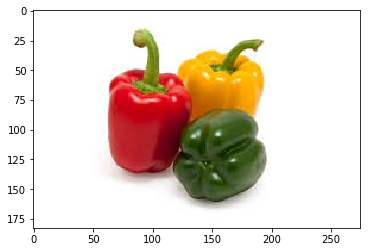

In [38]:
peppers = img_as_float(io.imread(os.path.join('images/', 'peppers.jpg')))
plt.imshow(peppers)

In [39]:
type(peppers)

numpy.ndarray

In [40]:
from skimage import exposure
exposure.histogram(peppers, nbins= 2) #for flattened image only not for colored image

D:\Softwares\Anaconda\lib\site-packages\skimage\exposure\exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


(array([ 29147, 121828], dtype=int64), array([ 0.25,  0.75]))

IndexError: too many indices for array

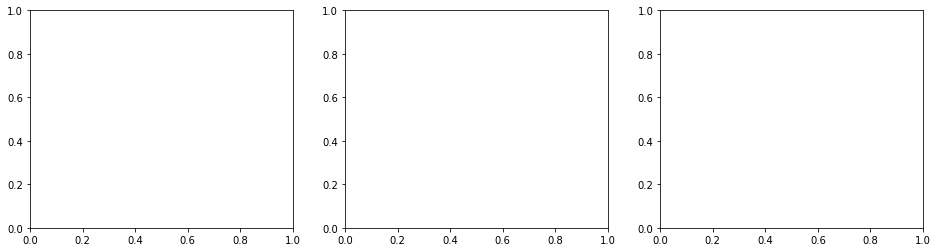

In [51]:
fig, axes = plt.subplots(nrows= 1, ncols= 3, figsize=(16, 4))

for c,c_color in enumerate(('red', 'green', 'blue')):
    img_hist, bins = exposure.histogram(peppers[..., c])
    axes[c, 1].plot(bins, img_hist / img_hist.max())